In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Dynamical programming 

## Recursion https://cxyxiaowu.com/articles/2019/04/04/1554345266086.html

In [ ]:
def f(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        return f(n-1)+f(n-2)

In [29]:
f(35)

14930352

```md
f(n) = f(n-1)+f(n-2) 
     = f(n-2)+f(n-3)+f(n-3)+f(n-4)
```

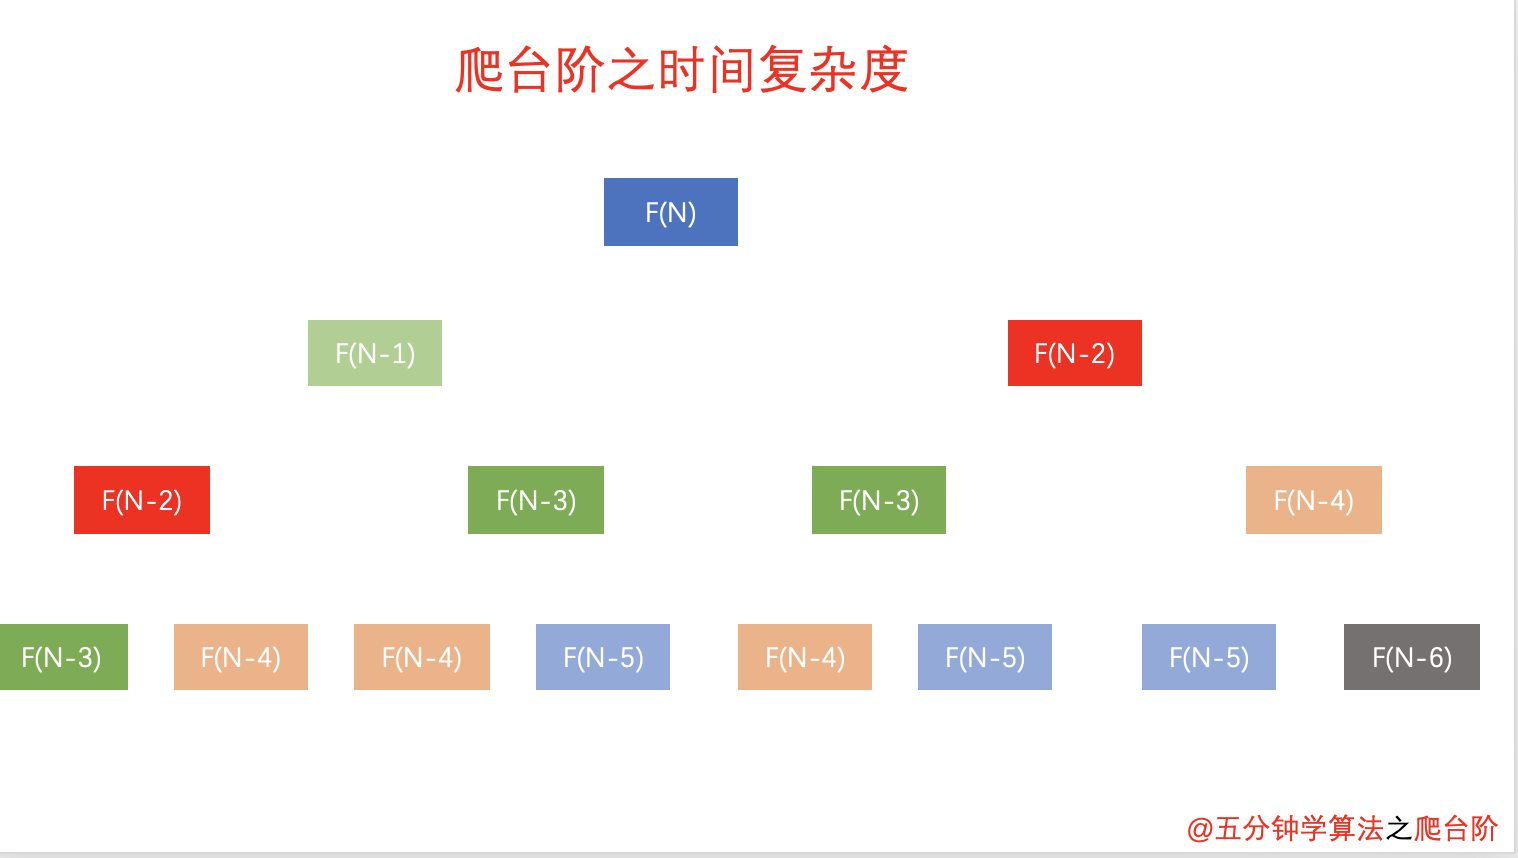

1. 找到如何将大问题分解为小问题的规律
2. 通过规律写出递推公式
3. 通过递归公式的临界点推敲出终止条件
4. 将递推公式和终止条件翻译成代码

```c
int f(int n) {
    if (n == 1) return 1;
    if (n == 2) return 2;
    // a 保存倒数第二个子状态数据，b 保存倒数第一个子状态数据， temp 保存当前状态的数据
    int a = 1, b = 2;
    int temp = a + b;
    for (int i = 3; i <= n; i++) {
        temp = a + b;
        a = b;
        b = temp; 
    }
    return temp; 
}
```

In [47]:
def f(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2

    else:
        a = 1
        b = 2
        i = 3
        while (i <= n):
            temp = a +b 
            a, b = b, temp
            i += 1
        return temp

In [50]:
f(100)

573147844013817084101

# Longest unrepeated substring

In [20]:
s = 'asskajw'
sList = list(s)

In [21]:
sList 
s[1]

['a', 's', 's', 'k', 'a', 'j', 'w']

's'

In [5]:
sDict = {}
start = 0
for index, value in enumerate(sList): 
    if value not in sDict:
        end = index
        ans = end - start + 1  
    else:
        start = index
        ans = max(end - start + 1, ans)
    sDict[index] = value
        
sDict
ans

{0: 'a', 1: 's', 2: 's', 3: 'k', 4: 'a', 5: 'j', 6: 'w'}

7

In [29]:
'a'  in sDict.values()

True

In [25]:
sDict.values()

dict_values(['a', 's', 's', 'k', 'a', 'j', 'w'])

## 滑动窗口
* https://leetcode-cn.com/problems/longest-substring-without-repeating-characters/solution/hua-dong-chuang-kou-by-powcai/

In [46]:
def lengthOfLongestSubstring( s: str) -> int: # the -> int just tells that f() returns an integer.
    # : str tells people who read the program (and some third-party libraries/programs, e. g. pylint) 
    # that s should be a str
    if not s:return 0
    left = 0
    lookup = set()
    n = len(s)
    max_len = 0
    cur_len = 0
    for i in range(n):
        cur_len += 1
        #print('s[{}]={}'.format(i, s[i]))
        while s[i] in lookup:
            #print("s[{}]= {}".format(left, s[left]))
            lookup.remove(s[left])
            
            #print('lookup = {}'.format(lookup))
            left += 1
            cur_len -= 1
        if cur_len > max_len: max_len = cur_len
        lookup.add(s[i]) 
        print('lookup = {}'.format(lookup))
    return max_len
lengthOfLongestSubstring('abcadefga')

lookup = {'a'}
lookup = {'a', 'b'}
lookup = {'c', 'a', 'b'}
lookup = {'c', 'a', 'b'}
lookup = {'c', 'a', 'b', 'd'}
lookup = {'e', 'c', 'b', 'd', 'a'}
lookup = {'e', 'c', 'b', 'd', 'a', 'f'}
lookup = {'e', 'c', 'b', 'd', 'g', 'a', 'f'}
lookup = {'e', 'd', 'g', 'a', 'f'}


7

In [44]:
lookup = set()
lookup.add('a')
lookup.add('b')
lookup.add('c')
lookup

{'a', 'b', 'c'}

In [28]:
s = 'abcadef'
lookup = set()
lookup.add(s[0])
lookup.add(s[1])
lookup.add(s[2])
lookup

{'a', 'b', 'c'}

In [57]:
a = set([1,2, 5, 3,4,1,3,5])
a 
a.add('a')
a
a.add('c')
a.add('b')
a 
a.remove(1)
a 
a = [2, 3, 4, 5, 'a', 'b', 'c']
a.index(2)

{1, 2, 3, 4, 5}

{1, 2, 3, 4, 5, 'a'}

{1, 2, 3, 4, 5, 'a', 'b', 'c'}

{2, 3, 4, 5, 'a', 'b', 'c'}

0

In [13]:
a.remove(1)

## 进栈法

In [70]:
class Solution(object):
    #此解法为进栈法
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        #获取字符串s对应的列表
        s_to_list = list(s)
        stack = []
        max_length = 0
        for value in s_to_list:
            #如果stack栈中不包含index元素，则可以进栈           
            if value not in stack:
                stack.append(value)           
                max_length = max(max_length, len(stack))
            #如果stack栈中包含index元素，则要将前面index元素之前的数都得拿出栈
            else:
                start = stack.index(value)
                stack[:] = stack[start+1:]
                #stack = stack[start+1:]
                stack.append(value)
            print('stack = {}'.format(stack))
        return max_length


if __name__ == "__main__":
    s = "abcabdcef"
    # s = "abcab"
    max_str = Solution().lengthOfLongestSubstring(s)
    print(max_str)

stack = ['a']
stack = ['a', 'b']
stack = ['a', 'b', 'c']
stack = ['b', 'c', 'a']
stack = ['c', 'a', 'b']
stack = ['c', 'a', 'b', 'd']
stack = ['a', 'b', 'd', 'c']
stack = ['a', 'b', 'd', 'c', 'e']
stack = ['a', 'b', 'd', 'c', 'e', 'f']
6


* https://leetcode.com/problems/longest-substring-without-repeating-characters/discuss/307810/Python-O(n)-times-48ms-beat-99.86

In [66]:
class Solution():
    def lengthOfLongestSubstring(self, s: str) -> int:
        # Initialization
        substring, length, max_len = "", 0, 0
        # At the beginning, our substring is empty. Then 
        # we can iteratively add new characters to the substring. 
        for c in s:
            # If duplicated characters appear, we have to cut off 
            # all the letters before the duplicated one, including 
            # the one that is duplicated, from our substring, in 
            # order to keep our substring continuous. 
            if c in substring:
                index = substring.find(c)
                substring = substring[(index + 1)::]
            # Then we are able to add new character to our substring
            # to make sure that there is no duplicated characters and 
            # the substring itself is continuous.
            substring += c
            # For every iteration, we compute the length of substring
            length = len(substring)
            # Leave the max value of length for returning
            if length > max_len:
                max_len = length

        return max_len
if __name__ == "__main__":
    s = "abcabdcef"
    # s = "abcab"
    max_str = Solution().lengthOfLongestSubstring(s)
    print(max_str)
    

6


In [71]:
class Solution():
    def lengthOfLongestSubstring(self, s: str) -> int:
        substring, length, max_len = "", 0, 0
        for c in s:
            if c in substring:
                index = substring.find(c)
                substring = substring[(index + 1)::]
            substring += c
            length = len(substring)
            if length > max_len:
                max_len = length

        return max_len
if __name__ == "__main__":
    s = "abcdefa"
    # s = "abcab"
    max_str = Solution().lengthOfLongestSubstring(s)
    print(max_str)
    

6


In [69]:
s = "abcabdcef"
s.find('a')
s.find('b')

0

1

# Ugly number

In [79]:
class Solution(object):
    def nthUglyNumber(self, n):
        """
        :type n: int
        :rtype: int
        """
        res = [1]
        idx2 = 0
        idx3 = 0
        idx5 = 0
        for i in range(n-1):
            res.append(min(res[idx2]*2,res[idx3]*3,res[idx5]*5))
            if res[-1] == res[idx2]*2:
                idx2 += 1
            if res[-1] == res[idx3]*3:
                idx3 += 1
            if res[-1] == res[idx5]*5:
                idx5 += 1
        return res[-1]
    
a = Solution()
a.nthUglyNumber(150)

5832

In [81]:
from heapq import heappush, heappop

# Renat Bekbolatov 2018
class Solution:
    def nthUglyNumber(self, n):
        q, counted = [1], {1}
        for i in range(n - 1):
            m = heappop(q)
            for mm in [2*m, 3*m, 5*m]:
                if mm not in counted:
                    heappush(q, mm)
                    counted.add(mm)        
        return heappop(q)
a = Solution()
a.nthUglyNumber(150)

5832

# https://leetcode.com/problems/search-insert-position/

```md
Example 1:

Input: [1,3,5,6], 5
Output: 2
Example 2:

Input: [1,3,5,6], 2
Output: 1
Example 3:

Input: [1,3,5,6], 7
Output: 4
Example 4:

Input: [1,3,5,6], 0
Output: 0
```

In [85]:
class Solution():
    def searchInsertPosition(self, arr:list, i:int)->int:
  
        n = len(arr)
        left = 0
        right = n - 1

        # Define the condition when the loop should be broken 
        while (left <= right):
            mid = (left + right ) // 2
            if arr[mid] == i:
                return mid
            elif arr[mid] < i:
                left = mid + 1 
            else:
                right = mid - 1
      
                
        return mid 
a = Solution()
arr = [1,3,5,6]
a.searchInsertPosition(arr, 0)
        

0

# https://leetcode.com/problems/linked-list-cycle

In [ ]:
# 快指针速度是慢指针的两倍。终止条件是快指针指向None或者快慢指针相等
class solution():
    def linkedListHasCycle(self, head) -> bool:
        """
        :type head: ListNode
        :rtype: bool
        """
        if head == None:
            return False
        s = head 
        f = head
        while(f != None): # Will it cause s and f meet again and again?
            if f->next == None:
                return False;
            else:
                f = f.next.next
                s = s.next            
            if f == s:
                return True 
        #When f != None doesn't holds
        return False
        

In [ ]:
class Solution(object):
    def hasCycle(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        if not head: return False
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow is fast:
                return True
        return False

In [ ]:
# https://leetcode.com/problems/linked-list-cycle/discuss/301358/Python-O(1)-Space-Solution-(Python-36ms)
def hasCycle(head):
	node = head
	while node:
		if node.next == None: return False
		elif node.next == head: return True
		tmp = node.next
		node.next = head
		node = tmp
	return False

* Creation of Linked list
* head
* node
* next

In [ ]:
class node():
    def __init__(self, data):
        self.data = data
        
        

In [3]:
a = None